<a href="https://colab.research.google.com/github/monsterikan/kondisi-fasilitas-Indonesia/blob/main/Progress_Final_Project_Mikael_Dewabrata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Tugas Akhir/kondisi_fasilitas_SMA-Indonesia.csv')
df = df.drop(df.columns[[0]], axis=1)

df

,Kecamatan,Kab.Kota,Provinsi,Kelas.Baik,Kelas.Rusak,Lab.Baik,Lab.Rusak,Perpus.Baik,Perpus.Rusak,UKS.Baik,UKS.Rusak,Toilet.Baik,Toilet.Rusak
0,Kec. Kepulauan Seribu Utara,Kepulauan Seribu,DKI Jakarta,0,19,0,3,0,1,0,2,0,8
1,Kec. Tanah Abang,Jakarta Pusat,DKI Jakarta,152,13,46,1,15,2,32,2,128,8
2,Kec. Menteng,Jakarta Pusat,DKI Jakarta,70,0,20,0,7,0,9,1,36,4
3,Kec. Senen,Jakarta Pusat,DKI Jakarta,74,17,22,3,6,2,11,3,44,12
4,Kec. Johar Baru,Jakarta Pusat,DKI Jakarta,24,0,8,0,2,0,3,1,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Kec. Tanjung Palas Tengah,Bulungan,Kalimantan Tengah,6,0,0,0,1,0,0,0,0,0
5741,Kec. Peso,Bulungan,Kalimantan Tengah,1,7,1,1,0,1,0,2,0,8
5742,Kec. Sesayap,Tana Tidung,Kalimantan Tengah,22,0,3,0,1,0,2,0,8,0
5743,Kec. Sesayap Hilir,Tana Tidung,Kalimantan Tengah,9,0,0,0,1,0,4,0,16,0


In [6]:
df_baik = pd.read_csv('/content/gdrive/MyDrive/Tugas Akhir/kondisi_baik_total-Indonesia.csv')
df_baik = df_baik.drop(df.columns[[0]], axis=1)
df_baik.info()
df_baik.head()

df_baik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        924 non-null    int64 
 1   Kab.Kota          924 non-null    object
 2   Provinsi          885 non-null    object
 3   Kelas.RusakPerc   924 non-null    int64 
 4   Lab.RusakPerc     924 non-null    int64 
 5   UKS.RusakPerc     924 non-null    int64 
 6   Perpus.RusakPerc  924 non-null    int64 
 7   Toilet.RusakPerc  924 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 57.9+ KB


,Unnamed: 0,Kab.Kota,Provinsi,Kelas.RusakPerc,Lab.RusakPerc,UKS.RusakPerc,Perpus.RusakPerc,Toilet.RusakPerc
0,1,Sumedang,Jawa Barat,0,0,0,0,0
1,2,Majalengka,Jawa Barat,0,0,0,0,0
2,3,Majalengka,Jawa Barat,0,0,0,0,0
3,4,Majalengka,Jawa Barat,0,0,0,0,0
4,5,Majalengka,Jawa Barat,0,0,0,0,0
...,...,...,...,...,...,...,...,...
919,920,Malinau,Kalimantan Tengah,0,0,0,0,0
920,921,Malinau,Kalimantan Tengah,0,0,0,0,0
921,922,Bulungan,Kalimantan Tengah,0,0,0,0,0
922,923,Tana Tidung,Kalimantan Tengah,0,0,0,0,0


In [7]:
df_rusak = pd.read_csv('/content/gdrive/MyDrive/Tugas Akhir/kondisi_rusak_total-Indonesia.csv')
df_rusak = df_rusak.drop(df.columns[[0]], axis=1)
df_rusak.info()
df_rusak.head()

df_rusak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        87 non-null     int64 
 1   Kab.Kota          87 non-null     object
 2   Provinsi          87 non-null     object
 3   Kelas.RusakPerc   87 non-null     int64 
 4   Lab.RusakPerc     87 non-null     int64 
 5   UKS.RusakPerc     87 non-null     int64 
 6   Perpus.RusakPerc  87 non-null     int64 
 7   Toilet.RusakPerc  87 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 5.6+ KB


,Unnamed: 0,Kab.Kota,Provinsi,Kelas.RusakPerc,Lab.RusakPerc,UKS.RusakPerc,Perpus.RusakPerc,Toilet.RusakPerc
0,1,Kepulauan Seribu,DKI Jakarta,1,1,1,1,1
1,2,Cirebon,Jambi,1,1,1,1,1
2,3,Indramayu,Jambi,1,1,1,1,1
3,4,Sukabumi,Jawa Barat,1,1,1,1,1
4,5,Sukabumi,Jawa Barat,1,1,1,1,1
...,...,...,...,...,...,...,...,...
82,83,Pandeglang,Banten,1,1,1,1,1
83,84,Belitung Timur,Bangka Belitung,1,1,1,1,1
84,85,Pohuwato,DKI Jakarta,1,1,1,1,1
85,86,Karimun,Kalimantan Tengah,1,1,1,1,1


In [ ]:
df_perc = pd.read_csv('/content/gdrive/MyDrive/Tugas Akhir/kondisi_kerusakan_perc-Indonesia.csv')
df_perc = df_perc.drop(df_perc.columns[[0]], axis=1)
df_perc = df_perc.replace(np.nan, 0)

df_perc.info()
df_perc.head()

df_perc

In [11]:
df_perc_clean = pd.read_csv('/content/gdrive/MyDrive/Tugas Akhir/kondisi_kerusakan_perc_2-Indonesia.csv')


df_perc_clean.info()
df_perc_clean.head()

df_perc_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3449 non-null   int64  
 1   Kecamatan         3449 non-null   object 
 2   Kab.Kota          3449 non-null   object 
 3   Provinsi          3449 non-null   object 
 4   Kelas.RusakPerc   3449 non-null   float64
 5   Lab.RusakPerc     3449 non-null   float64
 6   UKS.RusakPerc     3449 non-null   float64
 7   Perpus.RusakPerc  3449 non-null   float64
 8   Toilet.RusakPerc  3449 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 242.6+ KB


,Unnamed: 0,Kecamatan,Kab.Kota,Provinsi,Kelas.RusakPerc,Lab.RusakPerc,UKS.RusakPerc,Perpus.RusakPerc,Toilet.RusakPerc
0,1,Kec. Tanah Abang,Jakarta Pusat,DKI Jakarta,0.08,0.02,0.04,0.12,0.06
1,2,Kec. Menteng,Jakarta Pusat,DKI Jakarta,0.00,0.00,0.05,0.00,0.10
2,3,Kec. Senen,Jakarta Pusat,DKI Jakarta,0.19,0.12,0.12,0.25,0.21
3,4,Kec. Johar Baru,Jakarta Pusat,DKI Jakarta,0.00,0.00,0.11,0.00,0.25
4,5,Kec. Cempaka Putih,Jakarta Pusat,DKI Jakarta,0.32,0.25,0.25,0.17,0.17
...,...,...,...,...,...,...,...,...,...
3444,3445,Kec. Tanjung Palas,Bulungan,Kalimantan Tengah,0.06,0.33,0.50,1.00,0.50
3445,3446,Kec. Tanjung Palas Utara,Bulungan,Kalimantan Tengah,0.00,0.00,0.25,0.00,0.50
3446,3447,Kec. Tanjung Palas Timur,Bulungan,Kalimantan Tengah,1.00,1.00,0.00,1.00,0.00
3447,3448,Kec. Tanjung Selor,Bulungan,Kalimantan Tengah,0.32,0.83,0.80,0.57,0.40


Text(0.5, 0, 'Damaged Classroom')

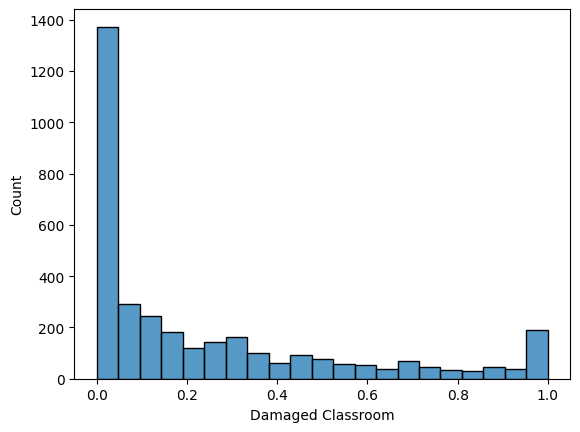

In [12]:
sns.histplot(data = df_perc_clean, x = "Kelas.RusakPerc")
plt.xlabel('Damaged Classroom')

Text(0.5, 0, 'Damaged Lab')

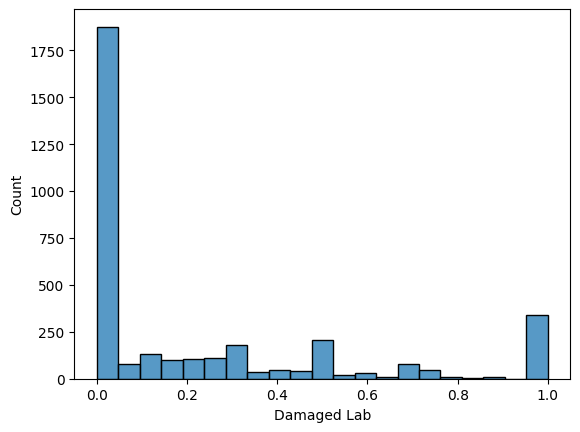

In [13]:
sns.histplot(data = df_perc_clean, x = "Lab.RusakPerc")
plt.xlabel('Damaged Lab')

Text(0.5, 0, 'Damaged Library')

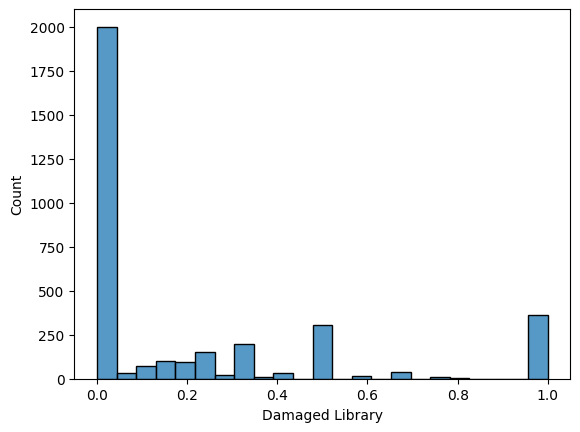

In [14]:
sns.histplot(data = df_perc_clean, x = "Perpus.RusakPerc")
plt.xlabel('Damaged Library')

Text(0.5, 0, 'Damaged Restroom')

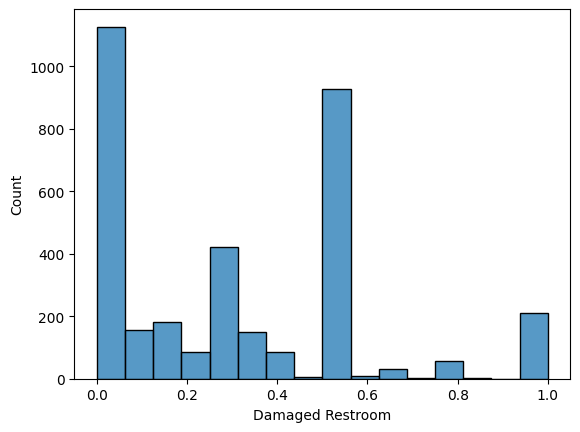

In [15]:
sns.histplot(data = df_perc_clean, x = "Toilet.RusakPerc")
plt.xlabel('Damaged Restroom')

Text(0.5, 0, 'Damaged Medical Facility')

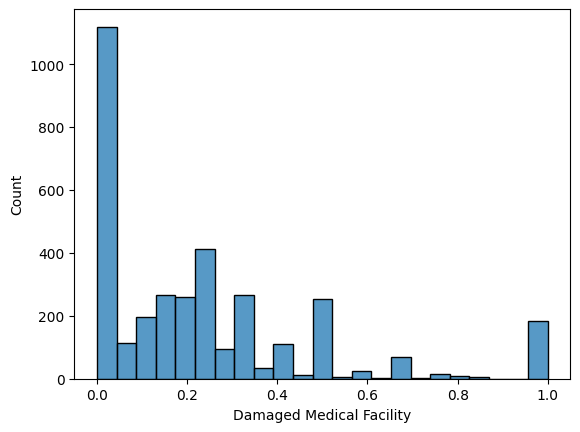

In [16]:
sns.histplot(data = df_perc_clean, x = "UKS.RusakPerc")
plt.xlabel('Damaged Medical Facility')

In [17]:
df_provinsi_perc = pd.pivot_table(data = df_perc,index=['Provinsi'],aggfunc=np.mean)
df_provinsi_perc = df_provinsi_perc.drop(df_provinsi_perc.index[[6,7]])
df_provinsi_perc = df_provinsi_perc.reset_index(level=0)
df_provinsi_perc.info()
df_provinsi_perc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provinsi          35 non-null     object 
 1   Kelas.RusakPerc   35 non-null     float64
 2   Lab.RusakPerc     35 non-null     float64
 3   Perpus.RusakPerc  35 non-null     float64
 4   Toilet.RusakPerc  35 non-null     float64
 5   UKS.RusakPerc     35 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB


<ipython-input-17-978246f29803>:1: FutureWarning: The operation <function mean at 0x7ea479967010> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_provinsi_perc = pd.pivot_table(data = df_perc,index=['Provinsi'],aggfunc=np.mean)


,Provinsi,Kelas.RusakPerc,Lab.RusakPerc,Perpus.RusakPerc,Toilet.RusakPerc,UKS.RusakPerc
0,0,0.152414,0.118836,0.125388,0.157716,0.108060
1,Bali,0.062766,0.073830,0.069787,0.158936,0.099787
2,Bangka Belitung,0.097941,0.115000,0.117647,0.115000,0.072941
3,Banten,0.175250,0.173687,0.149875,0.210000,0.176000
4,Bengkulu,0.383474,0.382000,0.327368,0.384737,0.345053
5,DI Yogyakarta,0.158667,0.175667,0.162000,0.259000,0.212167
6,"DT2 Kota, Kabupaten",0.133636,0.160000,0.258182,0.171818,0.126364
7,Gorontalo,0.119146,0.090732,0.088293,0.174878,0.140244
8,Jambi,0.109390,0.095488,0.102134,0.177256,0.150854
9,Jawa Barat,0.153993,0.146181,0.155590,0.220243,0.181719


In [18]:
df_provinsi = pd.pivot_table(data = df,index=['Provinsi'],aggfunc=np.sum)
df_provinsi = df_provinsi.drop(df_provinsi.index[[6,7]])
df_provinsi = df_provinsi.drop('Kabupaten')
df_provinsi = df_provinsi.reset_index(level=0)
df_provinsi.info()
df_provinsi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provinsi      33 non-null     object
 1   Kelas.Baik    33 non-null     int64 
 2   Kelas.Rusak   33 non-null     int64 
 3   Lab.Baik      33 non-null     int64 
 4   Lab.Rusak     33 non-null     int64 
 5   Perpus.Baik   33 non-null     int64 
 6   Perpus.Rusak  33 non-null     int64 
 7   Toilet.Baik   33 non-null     int64 
 8   Toilet.Rusak  33 non-null     int64 
 9   UKS.Baik      33 non-null     int64 
 10  UKS.Rusak     33 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.0+ KB


<ipython-input-18-fa6e471f43dd>:1: FutureWarning: The operation <function sum at 0x7ea4799660e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_provinsi = pd.pivot_table(data = df,index=['Provinsi'],aggfunc=np.sum)


,Provinsi,Kelas.Baik,Kelas.Rusak,Lab.Baik,Lab.Rusak,Perpus.Baik,Perpus.Rusak,Toilet.Baik,Toilet.Rusak,UKS.Baik,UKS.Rusak
0,Bali,2620,144,330,21,154,8,888,152,222,38
1,Bangka Belitung,793,59,140,13,54,5,340,44,85,11
2,Banten,6625,1177,895,147,547,76,2512,664,628,166
3,Bengkulu,1545,982,273,156,147,66,896,488,224,122
4,DI Yogyakarta,3544,456,713,92,288,34,1964,468,491,117
5,DKI Jakarta,4026,382,838,69,322,26,2164,328,541,82
6,Gorontalo,1457,279,212,34,115,20,452,180,113,45
7,Jambi,4977,676,640,79,352,41,1732,516,433,129
8,Jawa Barat,23144,3829,2939,464,1560,238,7956,2496,1989,624
9,Jawa Tengah,16288,2856,2181,446,1143,194,7020,2512,1755,628


In [19]:
df_provinsi.loc['Total'] = df[['Kelas.Baik','Kelas.Rusak','Lab.Baik','Lab.Rusak','Perpus.Baik','Perpus.Rusak','Toilet.Baik','Toilet.Rusak','UKS.Baik','UKS.Rusak']].sum()
df_provinsi_total = pd.DataFrame(df_provinsi.loc['Total'])
df_provinsi_total = df_provinsi_total.drop('Provinsi')
df_provinsi_total = df_provinsi_total.reset_index()

df_provinsi_total = df_provinsi_total.replace({'index':{'Kelas.Baik' : 'Classroom Good', 'Kelas.Rusak' : 'Damaged Classrom',
                                                        'Lab.Baik' : 'Lab Good', 'Lab.Rusak' : 'Damaged Lab',
                                                        'Perpus.Baik' : 'Library Good', 'Perpus.Rusak' : 'Damaged Library',
                                                        'Toilet.Baik' : 'Restroom Good', 'Toilet.Rusak' : 'Damaged Restroom',
                                                        'UKS.Baik' : 'Medical Fac Good', 'UKS.Rusak' : 'Damaged Medical Fac'}})

df_provinsi_total

,index,Total
0,Classroom Good,166093.0
1,Damaged Classrom,28472.0
2,Lab Good,23365.0
3,Damaged Lab,3958.0
4,Library Good,13000.0
5,Damaged Library,2010.0
6,Restroom Good,59392.0
7,Damaged Restroom,18444.0
8,Medical Fac Good,14848.0
9,Damaged Medical Fac,4611.0


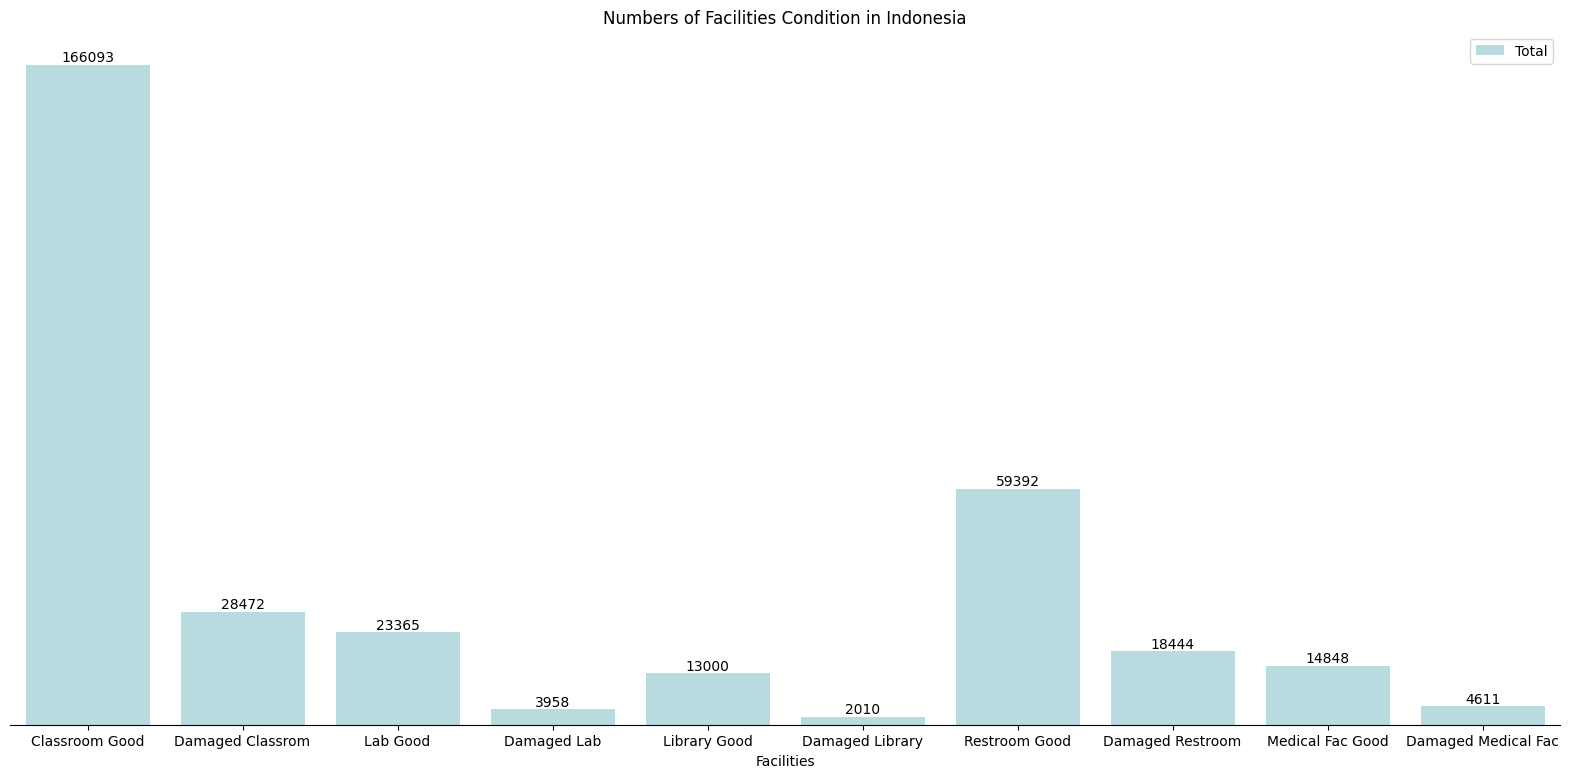

In [20]:
fig, ax = plt.subplots(figsize=(20, 9))

bar_plot1 = sns.barplot(x = 'index', y= 'Total', data = df_provinsi_total, label="Total", ax = ax, color="powderblue")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('')
plt.yticks([], [])

sns.despine(left=True)
plt.title('Numbers of Facilities Condition in Indonesia')
plt.xlabel('Facilities')

for p in bar_plot1.patches:
             bar_plot1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Show the plot
plt.show()

In [23]:
Z = np.array(df.iloc[:,4:13]) # all data
Z

array([[ 19,   0,   3, ...,   2,   0,   8],
       [ 13,  46,   1, ...,   2, 128,   8],
       [  0,  20,   0, ...,   1,  36,   4],
       ...,
       [  0,   3,   0, ...,   0,   8,   0],
       [  0,   0,   0, ...,   0,  16,   0],
       [  0,   1,   0, ...,   0,   8,   0]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

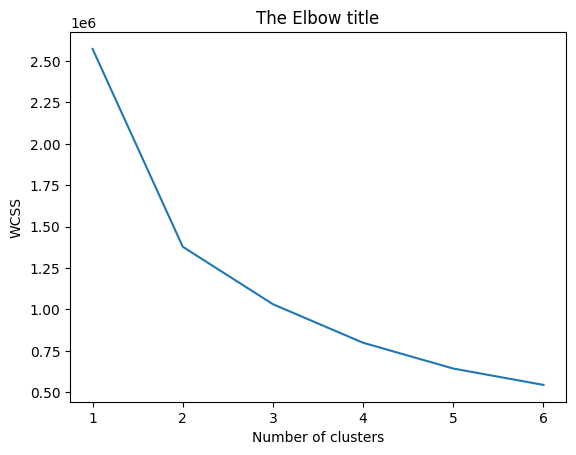

In [24]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(Z)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

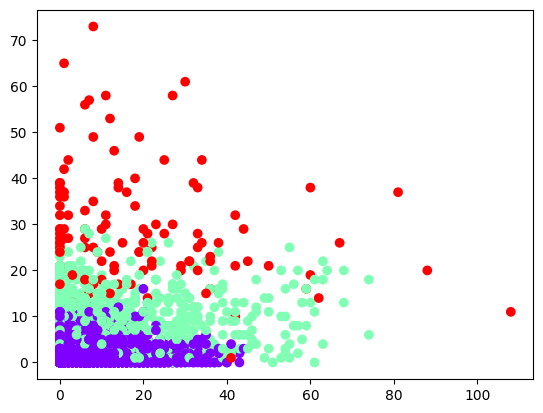

In [25]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(Z)

# Plot the data
plt.scatter(Z[:,0],Z[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [26]:
L = np.array(df_perc_clean.iloc[:,4:9]) # all data
L

array([[0.08, 0.02, 0.04, 0.12, 0.06],
       [0.  , 0.  , 0.05, 0.  , 0.1 ],
       [0.19, 0.12, 0.12, 0.25, 0.21],
       ...,
       [1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.32, 0.83, 0.8 , 0.57, 0.4 ],
       [0.88, 0.5 , 0.67, 1.  , 1.  ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

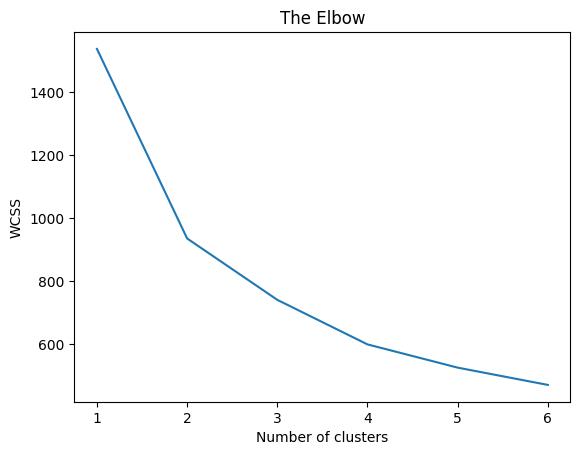

In [27]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(L)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

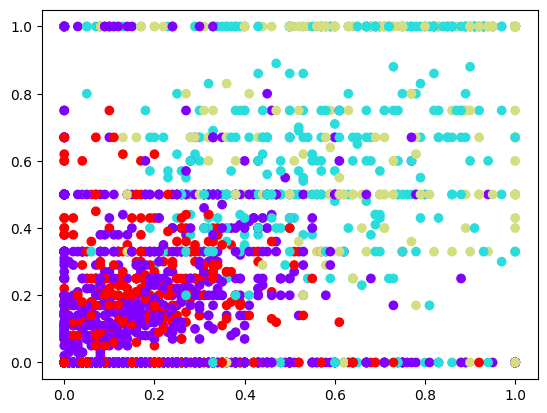

In [28]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(L)

# Plot the data
plt.scatter(L[:,0],L[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [29]:
df_perc_clean['Cluster'] = pd.Series(pred_y, index=df_perc_clean.index)

df_perc_clean

,Unnamed: 0,Kecamatan,Kab.Kota,Provinsi,Kelas.RusakPerc,Lab.RusakPerc,UKS.RusakPerc,Perpus.RusakPerc,Toilet.RusakPerc,Cluster
0,1,Kec. Tanah Abang,Jakarta Pusat,DKI Jakarta,0.08,0.02,0.04,0.12,0.06,0
1,2,Kec. Menteng,Jakarta Pusat,DKI Jakarta,0.00,0.00,0.05,0.00,0.10,0
2,3,Kec. Senen,Jakarta Pusat,DKI Jakarta,0.19,0.12,0.12,0.25,0.21,0
3,4,Kec. Johar Baru,Jakarta Pusat,DKI Jakarta,0.00,0.00,0.11,0.00,0.25,3
4,5,Kec. Cempaka Putih,Jakarta Pusat,DKI Jakarta,0.32,0.25,0.25,0.17,0.17,0
...,...,...,...,...,...,...,...,...,...,...
3444,3445,Kec. Tanjung Palas,Bulungan,Kalimantan Tengah,0.06,0.33,0.50,1.00,0.50,1
3445,3446,Kec. Tanjung Palas Utara,Bulungan,Kalimantan Tengah,0.00,0.00,0.25,0.00,0.50,3
3446,3447,Kec. Tanjung Palas Timur,Bulungan,Kalimantan Tengah,1.00,1.00,0.00,1.00,0.00,2
3447,3448,Kec. Tanjung Selor,Bulungan,Kalimantan Tengah,0.32,0.83,0.80,0.57,0.40,1


In [30]:
df_grouped = df_perc_clean.groupby('Cluster').agg({'Kelas.RusakPerc':['mean'],'Lab.RusakPerc':['mean'],'Perpus.RusakPerc':['mean'],'UKS.RusakPerc':['mean'],'Toilet.RusakPerc':['mean']})
df_grouped

,Kelas.RusakPerc,Lab.RusakPerc,Perpus.RusakPerc,UKS.RusakPerc,Toilet.RusakPerc
,mean,mean,mean,mean,mean
Cluster,,,,,
0,0.179556,0.140222,0.119418,0.054426,0.066309
1,0.584345,0.640943,0.558644,0.683494,0.688874
2,0.739048,0.740921,0.811778,0.006857,0.005619
3,0.074393,0.057688,0.053841,0.307516,0.441587


<Axes: xlabel='Cluster'>

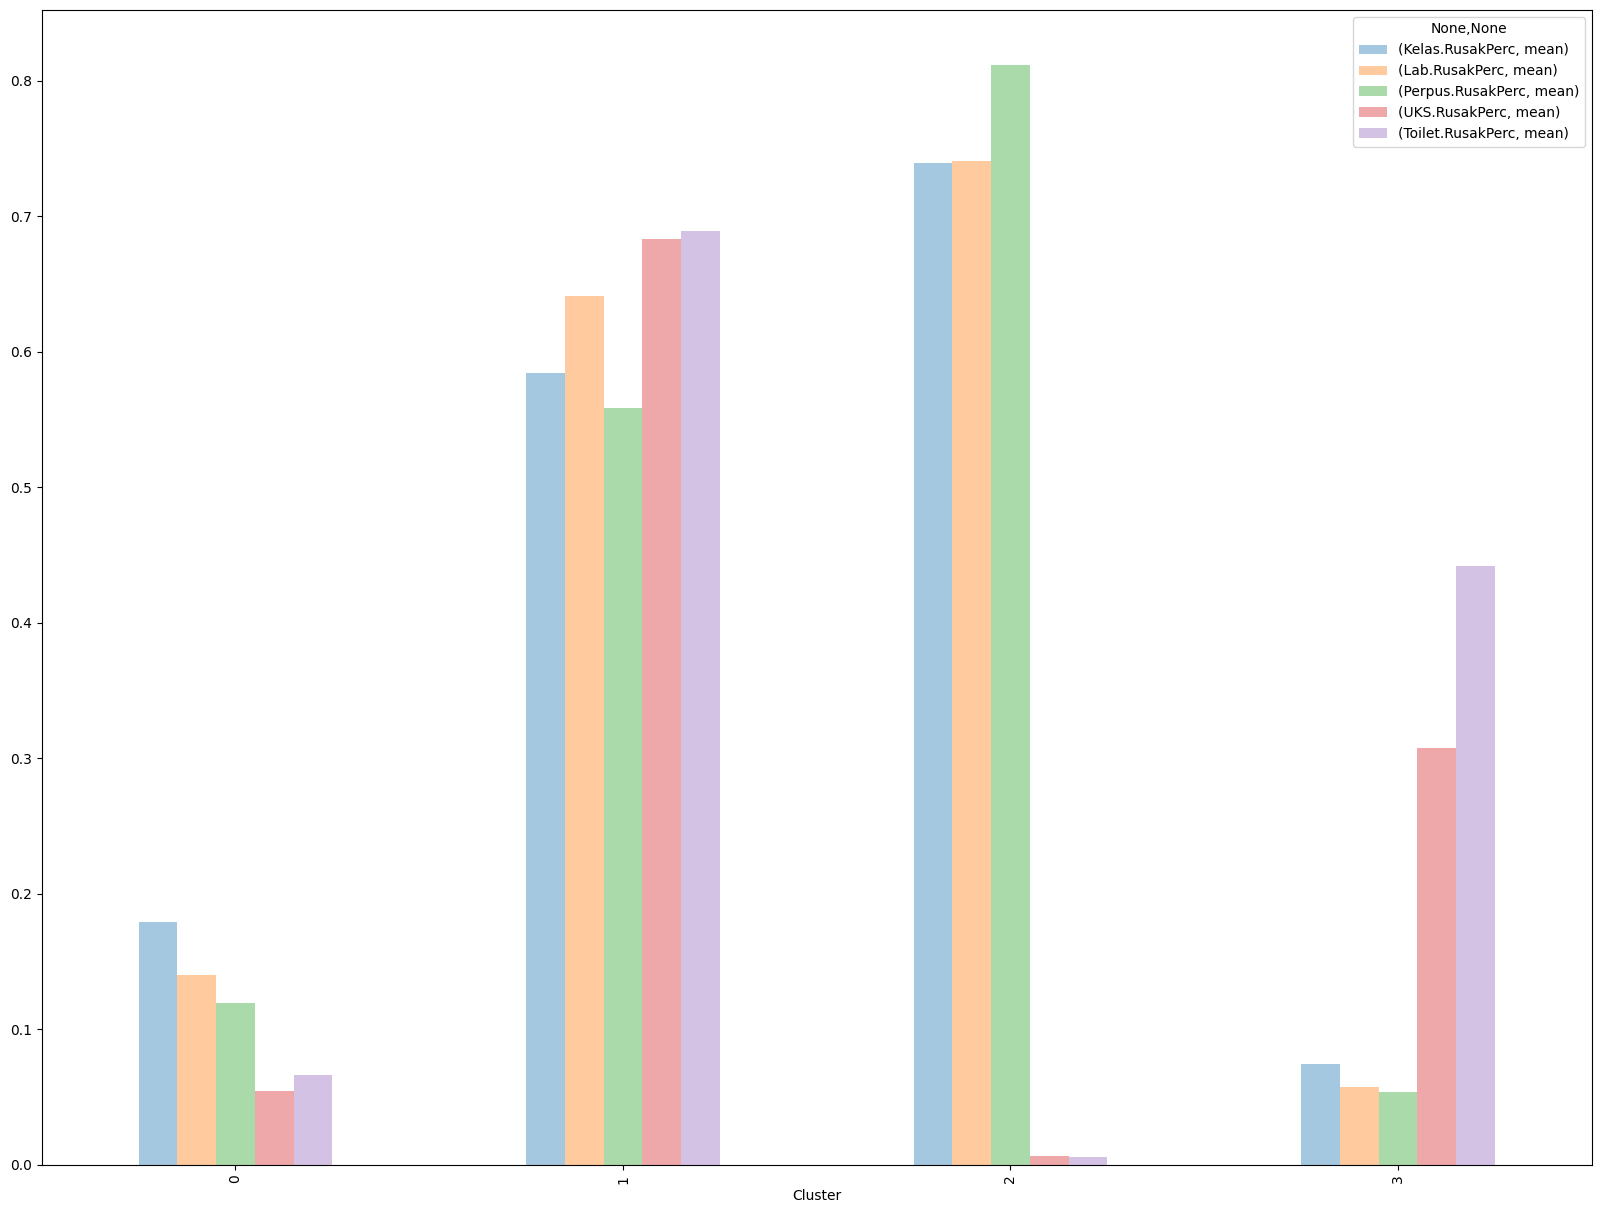

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
df_grouped.plot(kind='bar', stacked=False, alpha=0.4, ax=ax)

In [32]:
df_perc_clean['Cluster'].value_counts()

3    1393
0    1306
1     435
2     315
Name: Cluster, dtype: int64

In [33]:
df_perc_clean_pivot = df_perc_clean.groupby(['Provinsi', 'Cluster']).size().unstack(fill_value=0)
df_perc_clean_pivot = df_perc_clean_pivot.drop([df_perc_clean_pivot.index[0], df_perc_clean_pivot.index[7], df_perc_clean_pivot.index[8]])

df_perc_clean_pivot

Cluster,0,1,2,3
Provinsi,,,,
Bali,16,1,1,14
Bangka Belitung,11,1,1,4
Banten,52,13,7,45
Bengkulu,22,30,7,11
DI Yogyakarta,22,10,2,13
DKI Jakarta,27,0,3,3
Gorontalo,13,6,2,19
Jambi,43,7,4,47
Jawa Barat,144,44,26,185


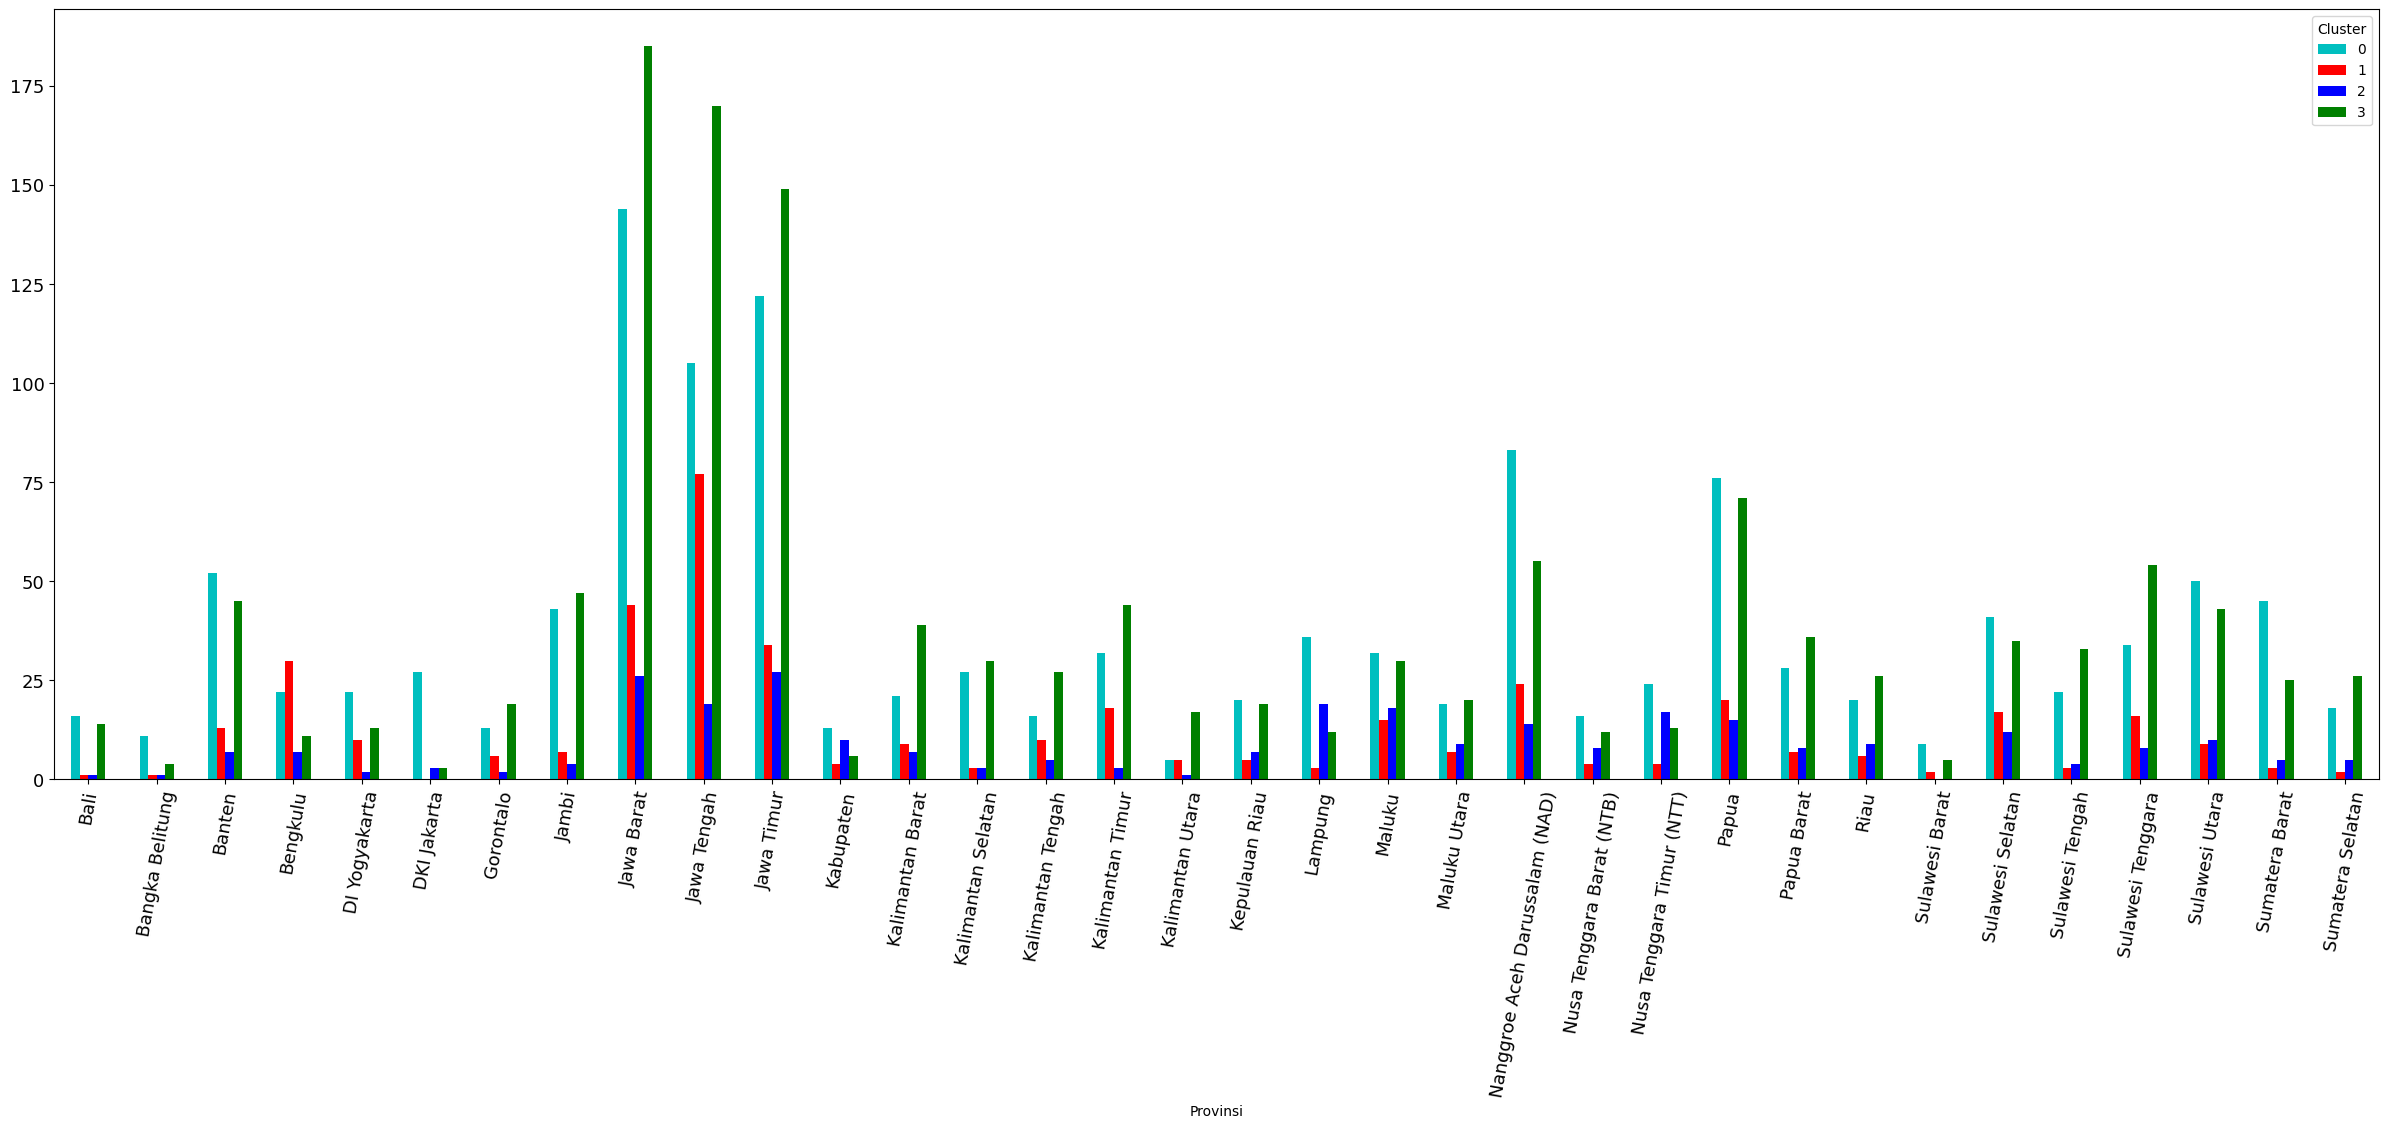

In [34]:
ax = df_perc_clean_pivot.plot(kind='bar', figsize=(30,10), color="crbg", fontsize=13);
ax.set_alpha(0.8)
plt.xticks(rotation=80)

plt.show()